# Question 1
## Part a.

In [1]:
import pandas as pd
filename = 'US_data.txt'
df = pd.read_csv(filename,delim_whitespace = True,parse_dates = True,index_col = 'Quarter')

In [2]:
df.head()

,PCEC,GDP,IRLTLT01USQ156N,GPDI
Quarter,,,,
1960-01-01,326.364,542.648,4.486667,96.476
1960-04-01,332.208,541.080,4.260000,87.096
1960-07-01,332.126,545.604,3.833333,86.377
1960-10-01,334.024,540.197,3.886667,75.963
1961-01-01,334.520,545.018,3.786667,78.378


In [3]:
from sympy import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
init_printing(use_latex = True)
from matplotlib import rcParams
import pandas as pd
import pandas_datareader as pdr
import datetime
import numpy as np
plt.style.use('fivethirtyeight')
#Seting font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import math
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import OLSInfluence



/Users/adityavenkatraman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## part b.

Text(0.5, 0, 'Investment')

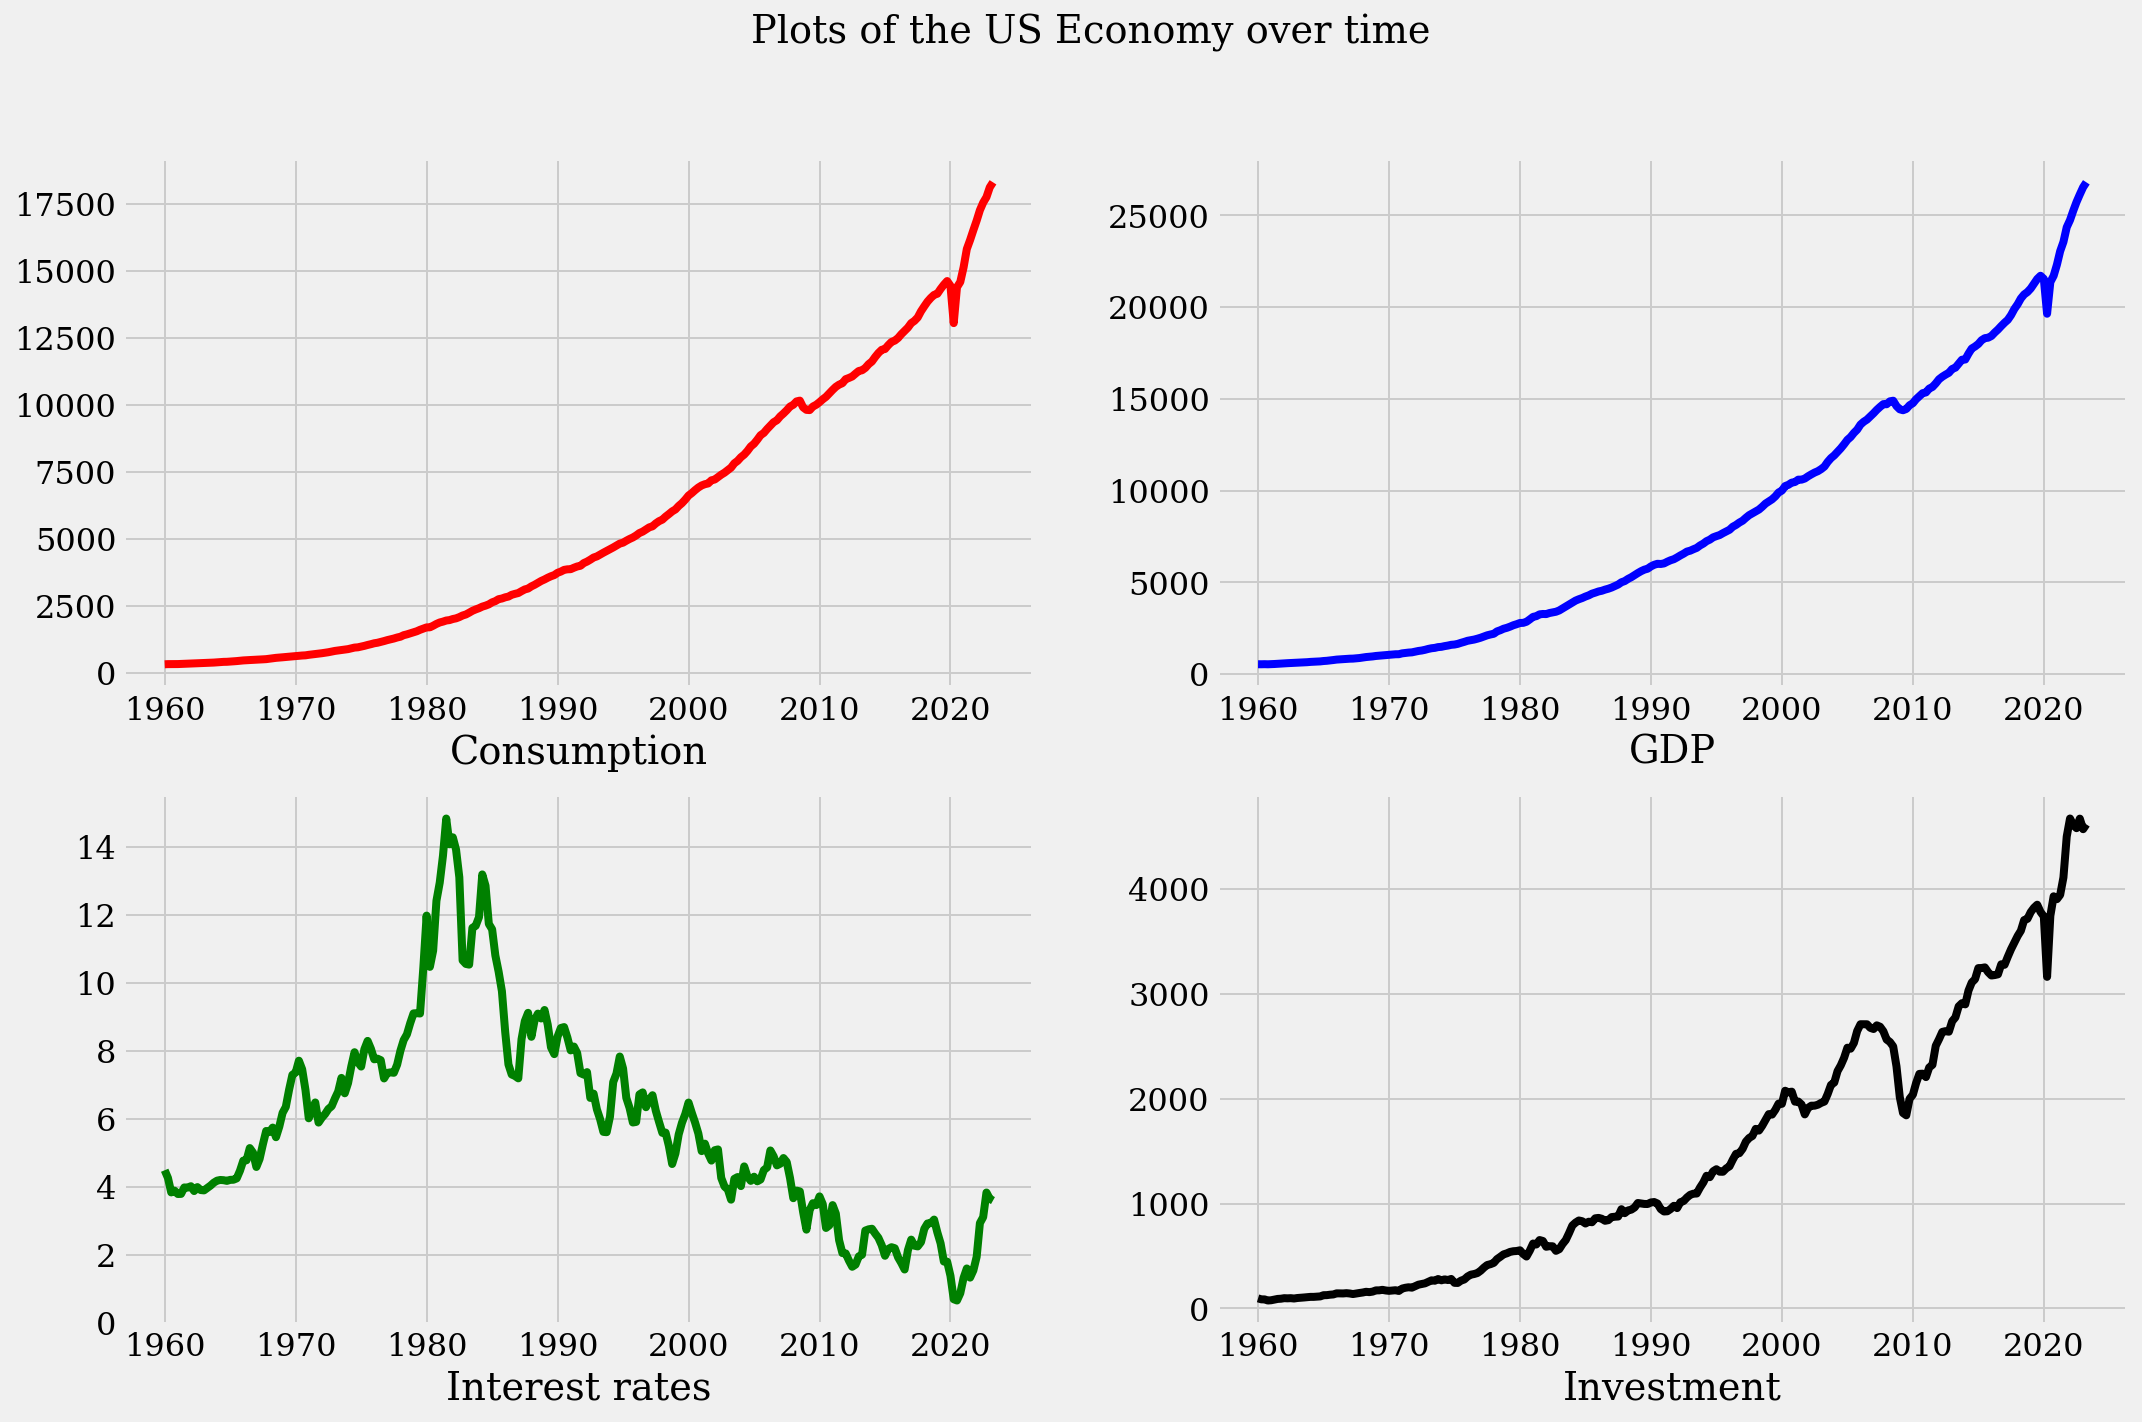

In [4]:
x = df.index
PCEC = df['PCEC']
GDP = df['GDP']
IRLTLT01USQ156N = df['IRLTLT01USQ156N']
GPDI = df['GPDI']

fig,ax = plt.subplots(2,2,sharey = False,sharex = False, figsize = (16,10))
fig.suptitle("Plots of the US Economy over time")
ax[0,0].plot(x,PCEC,color = 'red',linestyle = '-',linewidth = 4)
ax[0,1].plot(x,GDP,color = 'blue',linestyle = '-',linewidth = 4)
ax[1,0].plot(x,IRLTLT01USQ156N,color = 'green',linestyle = '-',linewidth = 4)
ax[1,1].plot(x,GPDI,color = 'black',linestyle = '-',linewidth = 4)
ax[0,0].set_xlabel('Consumption')
ax[0,1].set_xlabel('GDP')
ax[1,0].set_xlabel('Interest rates')
ax[1,1].set_xlabel('Investment')


Comsumption took a bit of a dip in the begining of 2020, but then started to rise drastically.This could be explained by the stimulus cheques provided during the 2020 lockdown conditions. 

GDP shows a similar trend, which could be explained by the CARES stimulus bill passed under the Trump administration.

Interest rates were kept low as part of the stimulus program, as well in part response to the stock market crash of March 2020. 

The gradual rise in interest rates from there on out were presumably to mitigiate the effects of the largest fiscal spending initiative of the time


## part c.

In [5]:
X = df[['GDP','IRLTLT01USQ156N']]
X = sm.add_constant(X)
Y = df['PCEC']
model1 = sm.OLS(Y,X)
results1 = model1.fit()
print(results1.summary())
print('Parameters: ', results1.params)
print('R2: ', results1.rsquared)


                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.269e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:11:46   Log-Likelihood:                -1459.0
No. Observations:                 254   AIC:                             2924.
Df Residuals:                     251   BIC:                             2935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.4708     18.219     

The R^2 of 1 strongly implies spurious regression, and that consumption is non stationary



GDP has an associated coefficient of 0.6789 with consumption, an above average rate of change of Consumption with GDP. (1 unit rise in GDP will cause a 0.6789 unit rise in comsumption)

Consumption and interest rates look to be strongly negatively correlated, with a 1 unit rise in rates cause a -23.2781 unit fall in consumption. 






In [6]:
X = df['IRLTLT01USQ156N']
X = sm.add_constant(X)
Y = df['GPDI']
model2 = sm.OLS(Y,X)
results2 = model2.fit()
print(results2.summary())
print('Parameters: ', results2.params)
print('R2: ', results2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           6.08e-27
Time:                        13:11:46   Log-Likelihood:                -2112.7
No. Observations:                 254   AIC:                             4229.
Df Residuals:                     252   BIC:                             4236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2958.9588    138.393     

The R^2 of 0.368 implies that approximately 37% of variation in Investment can be explained by Interest Rates.
Interest rates and Investment seem to be highly negatively correlated, with a 1 unit rise in Interest rates causing a -256.8835 units fall in Investment.

While the coeffeicent values seem exaggerated, the principle of interest rates hikes causing a fall in investment related spending is the basis of monetary policy.

check the units and rescale and explain in the context of investment and interest rates.

## part d.

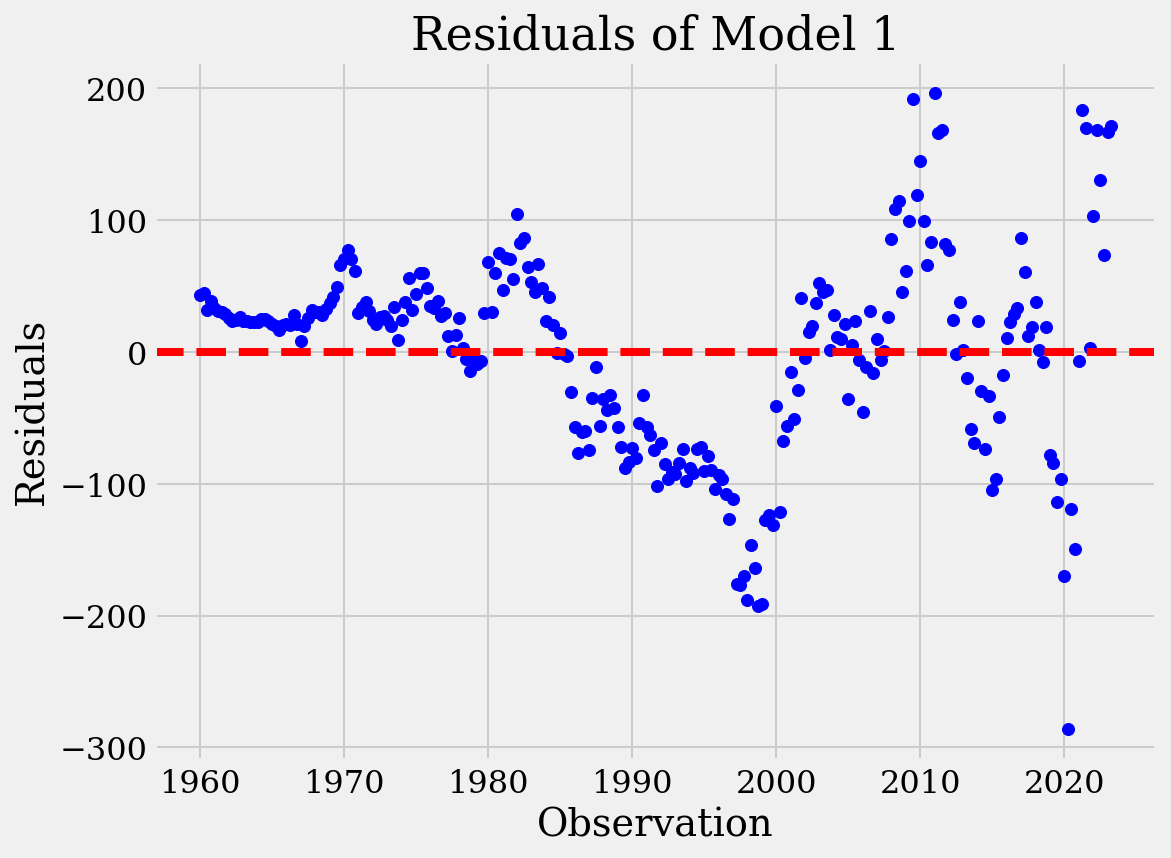

In [7]:
resid1 = results1.resid
resid2 = results2.resid
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid1, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Model 1')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

With the exception of the 2020 data point, the residuals demonstrate mean reversion 


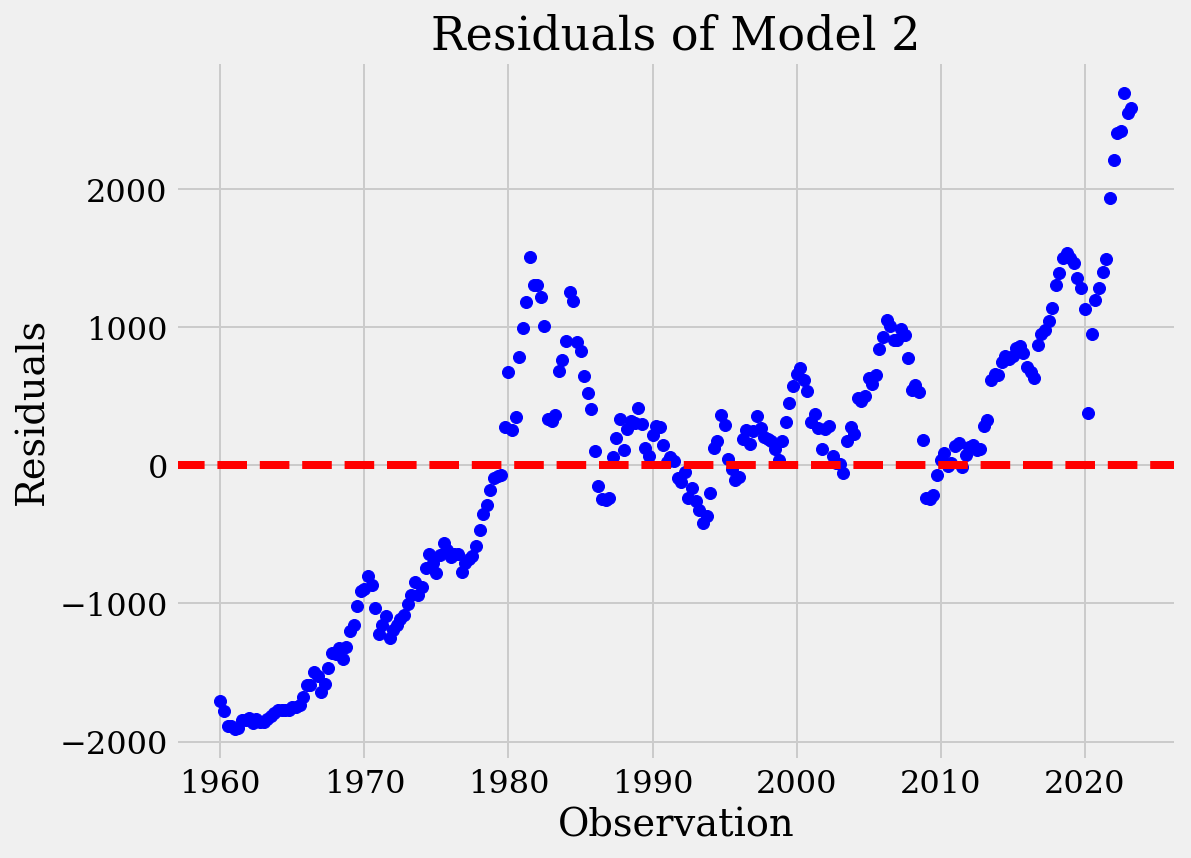

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid2, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Model 2')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The residual function looks similar to the investment time series, implying that interest rates are not explaining everything about trends in investment

## part e.

In [9]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['GDP','IRLTLT01USQ156N', 'time']]
X = sm.add_constant(X)
Y = df['PCEC']
model1 = sm.OLS(Y,X)
results1 = model1.fit()
print(results1.summary())
print('Parameters: ', results1.params)
print('R2: ', results1.rsquared)


                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.609e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:11:46   Log-Likelihood:                -1424.0
No. Observations:                 254   AIC:                             2856.
Df Residuals:                     250   BIC:                             2870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.5065     16.008     

GDP still seems to be positively correlated with consumption
Interest rates are negatively correlated
Time is slightly negatively correlated.

suspiciously high r^2

In [10]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['IRLTLT01USQ156N','time']]
X = sm.add_constant(X)
Y = df['GPDI']
model3 = sm.OLS(Y,X)
results3 = model3.fit()
print(results3.summary())
print('Parameters: ', results3.params)
print('R2: ', results3.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1873.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.39e-151
Time:                        13:11:47   Log-Likelihood:                -1819.5
No. Observations:                 254   AIC:                             3645.
Df Residuals:                     251   BIC:                             3656.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.9077     75.411     

Investment rates are negatively correlated with Interest rates

Time is positively correlated with Investment

suspiciously high r^2

## part f.

In [11]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['IRLTLT01USQ156N','time','GDP']]
X = sm.add_constant(X)
Y = df['GPDI']
model4 = sm.OLS(Y,X)
results4 = model4.fit()
print(results4.summary())
print('Parameters: ', results4.params)
print('R2: ', results4.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6342.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.64e-235
Time:                        13:11:47   Log-Likelihood:                -1619.1
No. Observations:                 254   AIC:                             3246.
Df Residuals:                     250   BIC:                             3260.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -80.4341     34.520     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


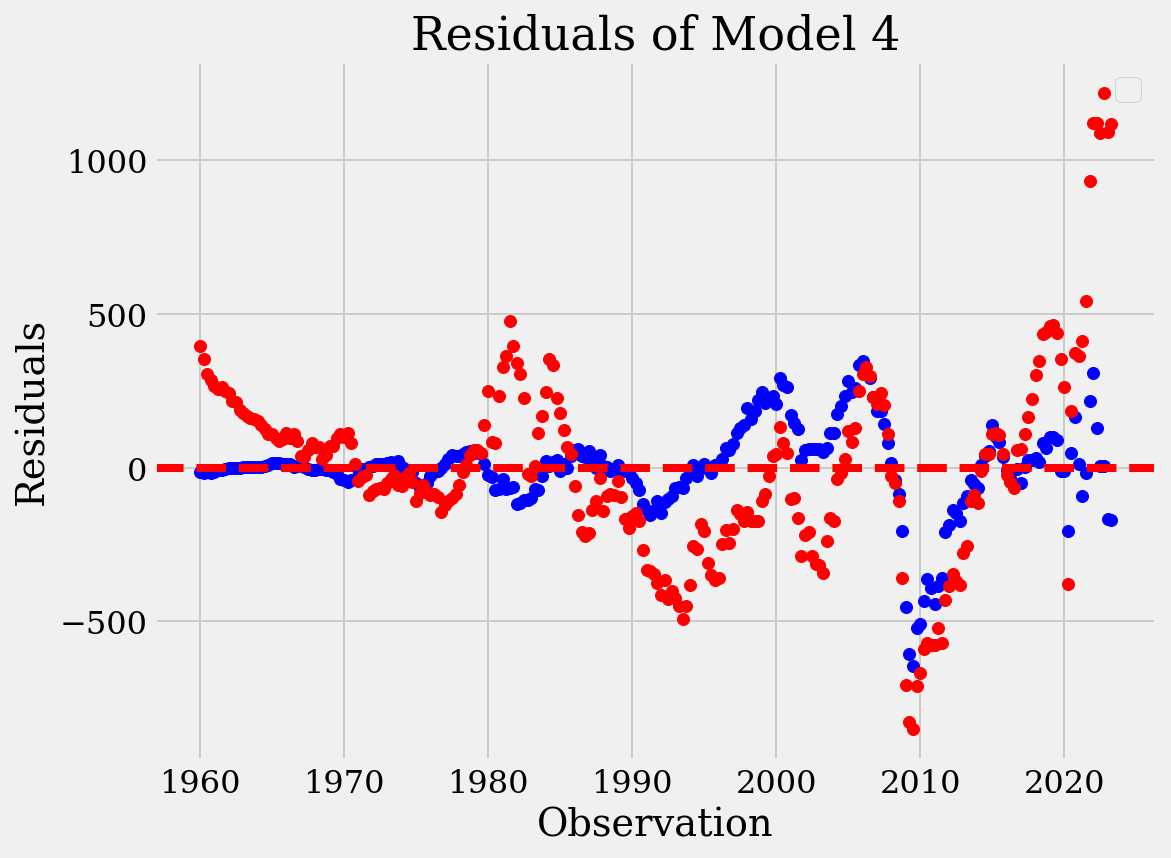

In [12]:
resid4 = results4.resid
resid3 = results3.resid
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid4, color='blue')
plt.scatter(df.index,resid3,color = 'red')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Model 4')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


Would not trust this as much as results 4. 

results3 from part e. seems to be more heteroskedastic as compared to results4 from part f.



# Question 2

In [29]:
from sympy import *
%matplotlib inline
init_printing(use_latex = True)
import sympy as sym
import numpy as np

sym.init_printing(use_latex=True)

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


mpl.rcParams['figure.dpi'] = 80
# for better picture quality
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')


In [30]:
Y,C,I,r = symbols('Y C I r')
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = symbols('Gbar Cbar Ibar Tbar Mbar Pbar')
c, b, k, h,s = symbols('c b k h s')



In [31]:
consumption_function=sym.Eq(C,Cbar+c*(Y-Tbar)+s*r)
display(consumption_function)

investment_function = sym.Eq(I,Ibar + b * r)
display(investment_function)

demand_function = sym.Eq(Y, C+I+Gbar)
display(demand_function)



In [32]:
ISsol = sym.solve([demand_function,consumption_function,investment_function],[Y,C,I])
ISsol

## part a.

In [33]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )


In [34]:
import scipy
import scipy.linalg

In [35]:
P, L ,U = scipy.linalg.lu(A)

In [36]:
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system

In [37]:
x

array([1.04454855e+03, 6.82473161e+02, 2.12075384e+02, 1.58047825e-01])

In [38]:
x = scipy.linalg.solve(A, d) # solution of the linear system using the SciPy solver
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html
x

array([1.04454855e+03, 6.82473161e+02, 2.12075384e+02, 1.58047825e-01])

In [39]:
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 200; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 200; T = 110; M = 200; P = 1           
production, Y = 1044.55，      
consumption, C = 682.47,       
investment, I = 212.08，      
interest rate (%), r = 15.80


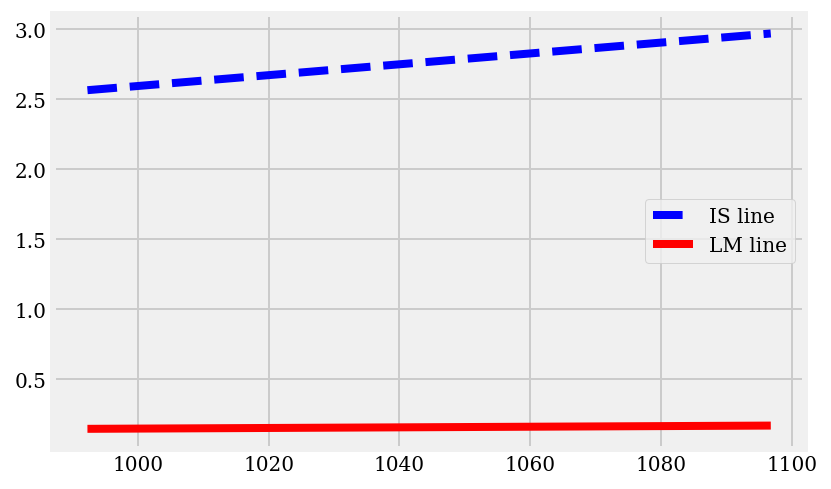

In [47]:
Y = np.linspace(0.95*x[0],1.05*x[0], num=100) 
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1
    
# IS: I=Y−C−G and I=I_bar−br expressed in terms of r

C = Cbar+c*(Y-Tbar) + s*15.80

I =Y-C-Gbar 

IS=( Ibar-I ) / b  

# LM: M_bar/P_bar=kY−hr expressed in terms of r

LM = 1/h*( k*Y-Mbar / Pbar )
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1)
#The numbering, num, helps keeping the notebook organized
#plt.figure(num=10)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
#plt.xlim((500, 560))
#plt.ylim((0.036, 0.05))

#plt.xlim((440, 500))
#plt.ylim((0.02, 0.04))

plt.legend()


## part b.

### model with G = 160

In [25]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 160
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
P, L ,U = scipy.linalg.lu(A)
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
x = scipy.linalg.solve(A, d)
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 160; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 160; T = 110; M = 200; P = 1           
production, Y = 1079.99，      
consumption, C = 707.31,       
investment, I = 212.68，      
interest rate (%), r = 16.59


### model with M = 210

In [28]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 160
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 210
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
P, L ,U = scipy.linalg.lu(A)
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
x = scipy.linalg.solve(A, d)
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 150; T = 110; M = 210; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 150; T = 110; M = 210; P = 1           
production, Y = 1079.15，      
consumption, C = 706.77,       
investment, I = 212.38，      
interest rate (%), r = 16.20
